# Vanilla MNIST neural network

## Environment setting

Importing libraries

In [1]:
import os
import numpy as np
import json
from keras.datasets import mnist
from keras.callbacks import TensorBoard, ModelCheckpoint
from preprocess import *
from utils import *
from model import *
from keras.models import model_from_json
from sklearn.metrics import confusion_matrix
from keras.utils import plot_model
import plotly.offline as py
import plotly.graph_objs as go
import plotly.io as pio

Using TensorFlow backend.


Setting plotly

In [2]:
py.init_notebook_mode(connected=True)

Defining global variables

In [3]:
data_status = ['train', 'validation', 'test']
categories = np.arange(10).tolist()

Defining output directory structure

In [4]:
path_structure = \
    {
        'preprocess': [],
        'model': [['stats']],
        'visualisation': [data_status, categories]
    }
paths = create_paths_from_dictionnary(path_structure)

## Preprocess and data visualisation

Loading splitting and preprocessing data

In [5]:
data = dict()
(data['x_train'], data['y_train']), (data['x_test'], data['y_test']) = mnist.load_data()
(data['x_train'], data['y_train']), (data['x_validation'], data['y_validation']) = data_split(data['x_train'],
                                                                                              data['y_train'])
data_to_categories(data, list(data))
save_data(paths['preprocess'], data)

Vizualizing the first 100 images of training, validation and test set

In [6]:
visualize_data(paths, data, data_status, notebook=True)

train sample number 0 (ground truth value = 5) :


train sample number 1 (ground truth value = 0) :


train sample number 2 (ground truth value = 4) :


train sample number 3 (ground truth value = 1) :


train sample number 4 (ground truth value = 9) :


train sample number 5 (ground truth value = 2) :


train sample number 6 (ground truth value = 1) :


train sample number 7 (ground truth value = 3) :


train sample number 8 (ground truth value = 1) :


train sample number 9 (ground truth value = 4) :


train sample number 10 (ground truth value = 3) :


train sample number 11 (ground truth value = 5) :


train sample number 12 (ground truth value = 3) :


train sample number 13 (ground truth value = 6) :


train sample number 14 (ground truth value = 1) :


train sample number 15 (ground truth value = 7) :


train sample number 16 (ground truth value = 2) :


train sample number 17 (ground truth value = 8) :


train sample number 18 (ground truth value = 6) :


train sample number 19 (ground truth value = 9) :


train sample number 20 (ground truth value = 4) :


train sample number 21 (ground truth value = 0) :


train sample number 22 (ground truth value = 9) :


train sample number 23 (ground truth value = 1) :


train sample number 24 (ground truth value = 1) :


train sample number 25 (ground truth value = 2) :


train sample number 26 (ground truth value = 4) :


train sample number 27 (ground truth value = 3) :


train sample number 28 (ground truth value = 2) :


train sample number 29 (ground truth value = 7) :


train sample number 30 (ground truth value = 3) :


train sample number 31 (ground truth value = 8) :


train sample number 32 (ground truth value = 6) :


train sample number 33 (ground truth value = 9) :


train sample number 34 (ground truth value = 0) :


train sample number 35 (ground truth value = 5) :


train sample number 36 (ground truth value = 6) :


train sample number 37 (ground truth value = 0) :


train sample number 38 (ground truth value = 7) :


train sample number 39 (ground truth value = 6) :


train sample number 40 (ground truth value = 1) :


train sample number 41 (ground truth value = 8) :


train sample number 42 (ground truth value = 7) :


train sample number 43 (ground truth value = 9) :


train sample number 44 (ground truth value = 3) :


train sample number 45 (ground truth value = 9) :


train sample number 46 (ground truth value = 8) :


train sample number 47 (ground truth value = 5) :


train sample number 48 (ground truth value = 9) :


train sample number 49 (ground truth value = 3) :


train sample number 50 (ground truth value = 3) :


train sample number 51 (ground truth value = 0) :


train sample number 52 (ground truth value = 7) :


train sample number 53 (ground truth value = 4) :


train sample number 54 (ground truth value = 9) :


train sample number 55 (ground truth value = 8) :


train sample number 56 (ground truth value = 0) :


train sample number 57 (ground truth value = 9) :


train sample number 58 (ground truth value = 4) :


train sample number 59 (ground truth value = 1) :


train sample number 60 (ground truth value = 4) :


train sample number 61 (ground truth value = 4) :


train sample number 62 (ground truth value = 6) :


train sample number 63 (ground truth value = 0) :


train sample number 64 (ground truth value = 4) :


train sample number 65 (ground truth value = 5) :


train sample number 66 (ground truth value = 6) :


train sample number 67 (ground truth value = 1) :


train sample number 68 (ground truth value = 0) :


train sample number 69 (ground truth value = 0) :


train sample number 70 (ground truth value = 1) :


train sample number 71 (ground truth value = 7) :


train sample number 72 (ground truth value = 1) :


train sample number 73 (ground truth value = 6) :


train sample number 74 (ground truth value = 3) :


train sample number 75 (ground truth value = 0) :


train sample number 76 (ground truth value = 2) :


train sample number 77 (ground truth value = 1) :


train sample number 78 (ground truth value = 1) :


train sample number 79 (ground truth value = 7) :


train sample number 80 (ground truth value = 9) :


train sample number 81 (ground truth value = 0) :


train sample number 82 (ground truth value = 2) :


train sample number 83 (ground truth value = 6) :


train sample number 84 (ground truth value = 7) :


train sample number 85 (ground truth value = 8) :


train sample number 86 (ground truth value = 3) :


train sample number 87 (ground truth value = 9) :


train sample number 88 (ground truth value = 0) :


train sample number 89 (ground truth value = 4) :


train sample number 90 (ground truth value = 6) :


train sample number 91 (ground truth value = 7) :


train sample number 92 (ground truth value = 4) :


train sample number 93 (ground truth value = 6) :


train sample number 94 (ground truth value = 8) :


train sample number 95 (ground truth value = 0) :


train sample number 96 (ground truth value = 7) :


train sample number 97 (ground truth value = 8) :


train sample number 98 (ground truth value = 3) :


train sample number 99 (ground truth value = 1) :


validation sample number 0 (ground truth value = 4) :


validation sample number 1 (ground truth value = 7) :


validation sample number 2 (ground truth value = 8) :


validation sample number 3 (ground truth value = 8) :


validation sample number 4 (ground truth value = 5) :


validation sample number 5 (ground truth value = 6) :


validation sample number 6 (ground truth value = 6) :


validation sample number 7 (ground truth value = 8) :


validation sample number 8 (ground truth value = 2) :


validation sample number 9 (ground truth value = 2) :


validation sample number 10 (ground truth value = 7) :


validation sample number 11 (ground truth value = 8) :


validation sample number 12 (ground truth value = 0) :


validation sample number 13 (ground truth value = 4) :


validation sample number 14 (ground truth value = 3) :


validation sample number 15 (ground truth value = 4) :


validation sample number 16 (ground truth value = 5) :


validation sample number 17 (ground truth value = 2) :


validation sample number 18 (ground truth value = 4) :


validation sample number 19 (ground truth value = 2) :


validation sample number 20 (ground truth value = 4) :


validation sample number 21 (ground truth value = 8) :


validation sample number 22 (ground truth value = 1) :


validation sample number 23 (ground truth value = 0) :


validation sample number 24 (ground truth value = 1) :


validation sample number 25 (ground truth value = 0) :


validation sample number 26 (ground truth value = 0) :


validation sample number 27 (ground truth value = 1) :


validation sample number 28 (ground truth value = 8) :


validation sample number 29 (ground truth value = 2) :


validation sample number 30 (ground truth value = 9) :


validation sample number 31 (ground truth value = 3) :


validation sample number 32 (ground truth value = 6) :


validation sample number 33 (ground truth value = 6) :


validation sample number 34 (ground truth value = 2) :


validation sample number 35 (ground truth value = 7) :


validation sample number 36 (ground truth value = 9) :


validation sample number 37 (ground truth value = 8) :


validation sample number 38 (ground truth value = 3) :


validation sample number 39 (ground truth value = 0) :


validation sample number 40 (ground truth value = 1) :


validation sample number 41 (ground truth value = 1) :


validation sample number 42 (ground truth value = 9) :


validation sample number 43 (ground truth value = 2) :


validation sample number 44 (ground truth value = 1) :


validation sample number 45 (ground truth value = 3) :


validation sample number 46 (ground truth value = 5) :


validation sample number 47 (ground truth value = 4) :


validation sample number 48 (ground truth value = 4) :


validation sample number 49 (ground truth value = 5) :


validation sample number 50 (ground truth value = 7) :


validation sample number 51 (ground truth value = 6) :


validation sample number 52 (ground truth value = 6) :


validation sample number 53 (ground truth value = 7) :


validation sample number 54 (ground truth value = 6) :


validation sample number 55 (ground truth value = 8) :


validation sample number 56 (ground truth value = 4) :


validation sample number 57 (ground truth value = 9) :


validation sample number 58 (ground truth value = 5) :


validation sample number 59 (ground truth value = 0) :


validation sample number 60 (ground truth value = 8) :


validation sample number 61 (ground truth value = 1) :


validation sample number 62 (ground truth value = 8) :


validation sample number 63 (ground truth value = 2) :


validation sample number 64 (ground truth value = 3) :


validation sample number 65 (ground truth value = 3) :


validation sample number 66 (ground truth value = 6) :


validation sample number 67 (ground truth value = 4) :


validation sample number 68 (ground truth value = 4) :


validation sample number 69 (ground truth value = 5) :


validation sample number 70 (ground truth value = 2) :


validation sample number 71 (ground truth value = 6) :


validation sample number 72 (ground truth value = 9) :


validation sample number 73 (ground truth value = 7) :


validation sample number 74 (ground truth value = 1) :


validation sample number 75 (ground truth value = 8) :


validation sample number 76 (ground truth value = 3) :


validation sample number 77 (ground truth value = 9) :


validation sample number 78 (ground truth value = 5) :


validation sample number 79 (ground truth value = 1) :


validation sample number 80 (ground truth value = 7) :


validation sample number 81 (ground truth value = 8) :


validation sample number 82 (ground truth value = 6) :


validation sample number 83 (ground truth value = 6) :


validation sample number 84 (ground truth value = 4) :


validation sample number 85 (ground truth value = 1) :


validation sample number 86 (ground truth value = 6) :


validation sample number 87 (ground truth value = 4) :


validation sample number 88 (ground truth value = 3) :


validation sample number 89 (ground truth value = 9) :


validation sample number 90 (ground truth value = 6) :


validation sample number 91 (ground truth value = 3) :


validation sample number 92 (ground truth value = 8) :


validation sample number 93 (ground truth value = 7) :


validation sample number 94 (ground truth value = 5) :


validation sample number 95 (ground truth value = 7) :


validation sample number 96 (ground truth value = 7) :


validation sample number 97 (ground truth value = 9) :


validation sample number 98 (ground truth value = 7) :


validation sample number 99 (ground truth value = 1) :


test sample number 0 (ground truth value = 7) :


test sample number 1 (ground truth value = 2) :


test sample number 2 (ground truth value = 1) :


test sample number 3 (ground truth value = 0) :


test sample number 4 (ground truth value = 4) :


test sample number 5 (ground truth value = 1) :


test sample number 6 (ground truth value = 4) :


test sample number 7 (ground truth value = 9) :


test sample number 8 (ground truth value = 5) :


test sample number 9 (ground truth value = 9) :


test sample number 10 (ground truth value = 0) :


test sample number 11 (ground truth value = 6) :


test sample number 12 (ground truth value = 9) :


test sample number 13 (ground truth value = 0) :


test sample number 14 (ground truth value = 1) :


test sample number 15 (ground truth value = 5) :


test sample number 16 (ground truth value = 9) :


test sample number 17 (ground truth value = 7) :


test sample number 18 (ground truth value = 3) :


test sample number 19 (ground truth value = 4) :


test sample number 20 (ground truth value = 9) :


test sample number 21 (ground truth value = 6) :


test sample number 22 (ground truth value = 6) :


test sample number 23 (ground truth value = 5) :


test sample number 24 (ground truth value = 4) :


test sample number 25 (ground truth value = 0) :


test sample number 26 (ground truth value = 7) :


test sample number 27 (ground truth value = 4) :


test sample number 28 (ground truth value = 0) :


test sample number 29 (ground truth value = 1) :


test sample number 30 (ground truth value = 3) :


test sample number 31 (ground truth value = 1) :


test sample number 32 (ground truth value = 3) :


test sample number 33 (ground truth value = 4) :


test sample number 34 (ground truth value = 7) :


test sample number 35 (ground truth value = 2) :


test sample number 36 (ground truth value = 7) :


test sample number 37 (ground truth value = 1) :


test sample number 38 (ground truth value = 2) :


test sample number 39 (ground truth value = 1) :


test sample number 40 (ground truth value = 1) :


test sample number 41 (ground truth value = 7) :


test sample number 42 (ground truth value = 4) :


test sample number 43 (ground truth value = 2) :


test sample number 44 (ground truth value = 3) :


test sample number 45 (ground truth value = 5) :


test sample number 46 (ground truth value = 1) :


test sample number 47 (ground truth value = 2) :


test sample number 48 (ground truth value = 4) :


test sample number 49 (ground truth value = 4) :


test sample number 50 (ground truth value = 6) :


test sample number 51 (ground truth value = 3) :


test sample number 52 (ground truth value = 5) :


test sample number 53 (ground truth value = 5) :


test sample number 54 (ground truth value = 6) :


test sample number 55 (ground truth value = 0) :


test sample number 56 (ground truth value = 4) :


test sample number 57 (ground truth value = 1) :


test sample number 58 (ground truth value = 9) :


test sample number 59 (ground truth value = 5) :


test sample number 60 (ground truth value = 7) :


test sample number 61 (ground truth value = 8) :


test sample number 62 (ground truth value = 9) :


test sample number 63 (ground truth value = 3) :


test sample number 64 (ground truth value = 7) :


test sample number 65 (ground truth value = 4) :


test sample number 66 (ground truth value = 6) :


test sample number 67 (ground truth value = 4) :


test sample number 68 (ground truth value = 3) :


test sample number 69 (ground truth value = 0) :


test sample number 70 (ground truth value = 7) :


test sample number 71 (ground truth value = 0) :


test sample number 72 (ground truth value = 2) :


test sample number 73 (ground truth value = 9) :


test sample number 74 (ground truth value = 1) :


test sample number 75 (ground truth value = 7) :


test sample number 76 (ground truth value = 3) :


test sample number 77 (ground truth value = 2) :


test sample number 78 (ground truth value = 9) :


test sample number 79 (ground truth value = 7) :


test sample number 80 (ground truth value = 7) :


test sample number 81 (ground truth value = 6) :


test sample number 82 (ground truth value = 2) :


test sample number 83 (ground truth value = 7) :


test sample number 84 (ground truth value = 8) :


test sample number 85 (ground truth value = 4) :


test sample number 86 (ground truth value = 7) :


test sample number 87 (ground truth value = 3) :


test sample number 88 (ground truth value = 6) :


test sample number 89 (ground truth value = 1) :


test sample number 90 (ground truth value = 3) :


test sample number 91 (ground truth value = 6) :


test sample number 92 (ground truth value = 9) :


test sample number 93 (ground truth value = 3) :


test sample number 94 (ground truth value = 1) :


test sample number 95 (ground truth value = 4) :


test sample number 96 (ground truth value = 1) :


test sample number 97 (ground truth value = 7) :


test sample number 98 (ground truth value = 6) :


test sample number 99 (ground truth value = 9) :


# Model definition and training

Defining hyperparameters and callbacks

In [7]:
hyperparameters =\
{
    'nb_inner_layers': 2,
    'nb_neurons_per_layers': 8,
    'activation_function': 'sigmoid',
    'batch_size': 50,
    'nb_epochs': 250,
    'loss': 'mean_squared_error',
    'optimizer': 'sgd',
    'metrics': ['categorical_accuracy']
}

callbacks = [TensorBoard(log_dir=paths['model'], histogram_freq=1, batch_size=hyperparameters['batch_size']),
             ModelCheckpoint(os.path.join(paths['model'], 'weights.hdf5'))]

Creating model

In [8]:
model = create_model(hyperparameters)

Saving model

In [9]:
with open(os.path.join(paths['model'],'model.json'), 'w') as json_file:
    json_file.write(model.to_json())

Training model

In [59]:
model.fit(data['x_train'], data['y_train_gt'],
          batch_size=hyperparameters['batch_size'],
          epochs=hyperparameters['nb_epochs'],
          verbose=1,
          callbacks=callbacks,
          validation_data=(data['x_validation'], data['y_validation_gt']))

Train on 48000 samples, validate on 12000 samples
Epoch 1/250
48000/48000 [==============================] - 2s 47us/step - loss: 0.1072 - categorical_accuracy: 0.1042 - val_loss: 0.0890 - val_categorical_accuracy: 0.1374
Epoch 2/250
48000/48000 [==============================] - 2s 47us/step - loss: 0.0885 - categorical_accuracy: 0.1839 - val_loss: 0.0878 - val_categorical_accuracy: 0.2148
Epoch 3/250
48000/48000 [==============================] - 2s 47us/step - loss: 0.0874 - categorical_accuracy: 0.2258 - val_loss: 0.0865 - val_categorical_accuracy: 0.2615
Epoch 4/250
48000/48000 [==============================] - 2s 46us/step - loss: 0.0861 - categorical_accuracy: 0.2728 - val_loss: 0.0854 - val_categorical_accuracy: 0.2980
Epoch 5/250
48000/48000 [==============================] - 3s 54us/step - loss: 0.0851 - categorical_accuracy: 0.2964 - val_loss: 0.0844 - val_categorical_accuracy: 0.3114
Epoch 6/250
48000/48000 [==============================] - 2s 47us/step - loss: 0.0842 - c

48000/48000 [==============================] - 3s 58us/step - loss: 0.0559 - categorical_accuracy: 0.7785 - val_loss: 0.0556 - val_categorical_accuracy: 0.7817
Epoch 49/250
48000/48000 [==============================] - 3s 66us/step - loss: 0.0556 - categorical_accuracy: 0.7799 - val_loss: 0.0555 - val_categorical_accuracy: 0.7772
Epoch 50/250
48000/48000 [==============================] - 3s 57us/step - loss: 0.0554 - categorical_accuracy: 0.7822 - val_loss: 0.0551 - val_categorical_accuracy: 0.7826
Epoch 51/250
48000/48000 [==============================] - 3s 68us/step - loss: 0.0552 - categorical_accuracy: 0.7807 - val_loss: 0.0549 - val_categorical_accuracy: 0.7826
Epoch 52/250
48000/48000 [==============================] - 3s 54us/step - loss: 0.0549 - categorical_accuracy: 0.7829 - val_loss: 0.0548 - val_categorical_accuracy: 0.7802
Epoch 53/250
48000/48000 [==============================] - 3s 55us/step - loss: 0.0547 - categorical_accuracy: 0.7821 - val_loss: 0.0546 - val_cate

48000/48000 [==============================] - 2s 48us/step - loss: 0.0498 - categorical_accuracy: 0.7894 - val_loss: 0.0501 - val_categorical_accuracy: 0.7883
Epoch 96/250
48000/48000 [==============================] - 2s 49us/step - loss: 0.0498 - categorical_accuracy: 0.7909 - val_loss: 0.0500 - val_categorical_accuracy: 0.7892
Epoch 97/250
48000/48000 [==============================] - 2s 47us/step - loss: 0.0496 - categorical_accuracy: 0.7920 - val_loss: 0.0499 - val_categorical_accuracy: 0.7876
Epoch 98/250
48000/48000 [==============================] - 3s 59us/step - loss: 0.0495 - categorical_accuracy: 0.7920 - val_loss: 0.0500 - val_categorical_accuracy: 0.7855
Epoch 99/250
48000/48000 [==============================] - 2s 47us/step - loss: 0.0496 - categorical_accuracy: 0.7909 - val_loss: 0.0497 - val_categorical_accuracy: 0.7883
Epoch 100/250
48000/48000 [==============================] - 3s 53us/step - loss: 0.0494 - categorical_accuracy: 0.7928 - val_loss: 0.0497 - val_cat

48000/48000 [==============================] - 2s 48us/step - loss: 0.0465 - categorical_accuracy: 0.7941 - val_loss: 0.0475 - val_categorical_accuracy: 0.7782
Epoch 143/250
48000/48000 [==============================] - 3s 52us/step - loss: 0.0465 - categorical_accuracy: 0.7925 - val_loss: 0.0471 - val_categorical_accuracy: 0.7842
Epoch 144/250
48000/48000 [==============================] - 2s 46us/step - loss: 0.0464 - categorical_accuracy: 0.7928 - val_loss: 0.0473 - val_categorical_accuracy: 0.7823
Epoch 145/250
48000/48000 [==============================] - 3s 53us/step - loss: 0.0464 - categorical_accuracy: 0.7938 - val_loss: 0.0471 - val_categorical_accuracy: 0.7873
Epoch 146/250
48000/48000 [==============================] - 2s 46us/step - loss: 0.0464 - categorical_accuracy: 0.7927 - val_loss: 0.0471 - val_categorical_accuracy: 0.7846
Epoch 147/250
48000/48000 [==============================] - 2s 44us/step - loss: 0.0463 - categorical_accuracy: 0.7919 - val_loss: 0.0469 - val

48000/48000 [==============================] - 2s 44us/step - loss: 0.0447 - categorical_accuracy: 0.7975 - val_loss: 0.0455 - val_categorical_accuracy: 0.7888
Epoch 190/250
48000/48000 [==============================] - 2s 49us/step - loss: 0.0446 - categorical_accuracy: 0.7975 - val_loss: 0.0456 - val_categorical_accuracy: 0.7877
Epoch 191/250
48000/48000 [==============================] - 2s 41us/step - loss: 0.0445 - categorical_accuracy: 0.7977 - val_loss: 0.0456 - val_categorical_accuracy: 0.7857
Epoch 192/250
48000/48000 [==============================] - 2s 41us/step - loss: 0.0444 - categorical_accuracy: 0.7977 - val_loss: 0.0455 - val_categorical_accuracy: 0.7884
Epoch 193/250
48000/48000 [==============================] - 2s 49us/step - loss: 0.0444 - categorical_accuracy: 0.7985 - val_loss: 0.0455 - val_categorical_accuracy: 0.7893
Epoch 194/250
48000/48000 [==============================] - 2s 41us/step - loss: 0.0444 - categorical_accuracy: 0.7982 - val_loss: 0.0454 - val

48000/48000 [==============================] - 3s 56us/step - loss: 0.0432 - categorical_accuracy: 0.8013 - val_loss: 0.0445 - val_categorical_accuracy: 0.7881
Epoch 237/250
48000/48000 [==============================] - 2s 47us/step - loss: 0.0434 - categorical_accuracy: 0.7990 - val_loss: 0.0443 - val_categorical_accuracy: 0.7925
Epoch 238/250
48000/48000 [==============================] - 2s 49us/step - loss: 0.0432 - categorical_accuracy: 0.8011 - val_loss: 0.0446 - val_categorical_accuracy: 0.7912
Epoch 239/250
48000/48000 [==============================] - 3s 56us/step - loss: 0.0432 - categorical_accuracy: 0.8010 - val_loss: 0.0446 - val_categorical_accuracy: 0.7874
Epoch 240/250
48000/48000 [==============================] - 3s 56us/step - loss: 0.0432 - categorical_accuracy: 0.8020 - val_loss: 0.0444 - val_categorical_accuracy: 0.7907
Epoch 241/250
48000/48000 [==============================] - 3s 63us/step - loss: 0.0431 - categorical_accuracy: 0.8005 - val_loss: 0.0442 - val

Plotting model

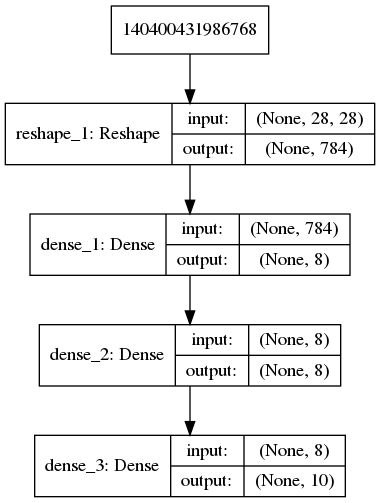

In [10]:
plot_model(model, os.path.join(paths['model'], 'model.png'),
          show_shapes=True)
display(Image(filename=os.path.join(paths['model'], 'model.png')))

## Model evaluation

Loading model

In [11]:
json_file = open(os.path.join(paths['model'],'model.json'), 'r')
loaded_model_json = json_file.read()
model = model_from_json(loaded_model_json)
json_file.close()
model.load_weights(os.path.join(paths['model'], 'weights.hdf5'))

Evaluating model on test set

In [12]:
prediction = np.argmax(model.predict(data['x_test'], batch_size=hyperparameters['batch_size']), axis=-1)

Computing and displaying confusion matrix

In [13]:
confusion = confusion_matrix(data['y_test'].tolist(), prediction.tolist())
trace = go.Heatmap(z=confusion)
data=[trace]
layout = go.Layout(
    title='Confusion matrix',
    xaxis = dict(ticks='', nticks=10),
    yaxis = dict(ticks='', nticks=10)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='confusion')
pio.write_image(fig, os.path.join(paths['model/stats'], 'confusion_matrix.png'))